# **이변량분석 - 숫자 vs 범주**

## **1.환경준비**

* 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [4]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## **2.숫자 --> 범주**

### **(1) 시각화**

* 히스토그램을 Survived로 나눠서 그려봅시다.

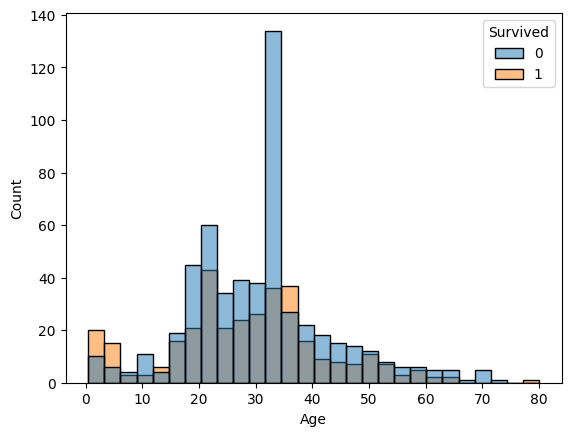

In [5]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived', common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ② kdeplot(   , hue = 'Survived', multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived', common_norm = False)

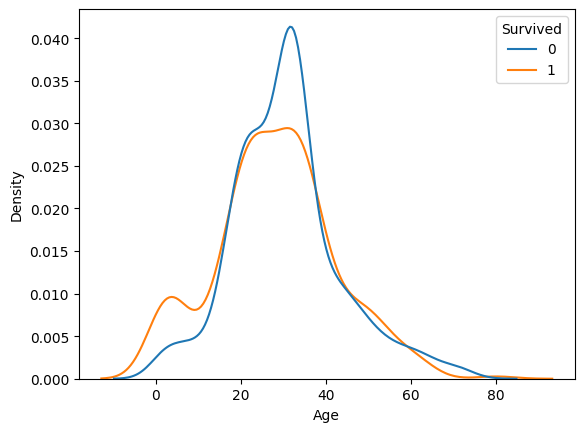

In [6]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived',
            common_norm = False)
plt.show()

② kdeplot( , hue = 'Survived', multiple = 'fill')

혹은 histplot( , hue = 'Survived', multiple = 'fill')

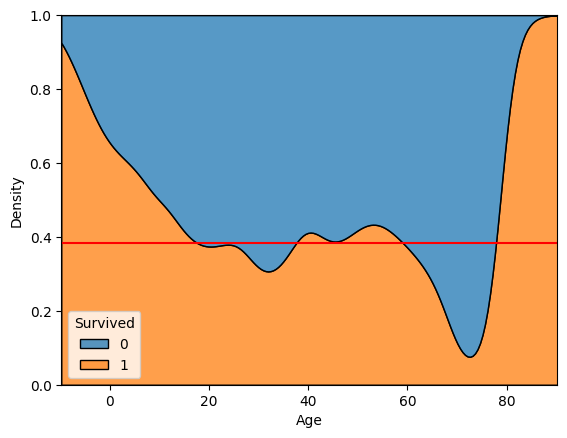

In [7]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

## 두 그래프의 비교 및 해석

### 비교
    common_norm=False를 이용해서 그린 그래프에서, 두 곡선의 교점은 총 5곳 존재한다.

    두 번째 방법을 이용해서 그린 곡선에서, 전체 평균 생존율을 의미하는 빨간 직선과 곡선 사이의 교점은 5개이다.

    => 각각의 그래프에 존재하는 5개의 교점은 서로 같다.

### 해석
    
    약 15세 이하는 생존율이 전체 평균보다 높다.
    20~30대는 생존율이 전체 평균보다 낮다.
    60~70대는 대부분 사망.

    첫 번째 그래프에서 생긴 두 곡선의 교점은 생존율이 전체 평균과 같은 지점이다.

    두 개의 곡선 사이의 괴리가 클수록 feature에 따른 결과의 차이가 크다고 이야기할 수 있다.

### 결론

    그래프 사이의 괴리가 클수록 feature와 label 사이의 관련성이 크다고 할 수 있다.

    그래프 사이의 괴리가 작을수록 feature와 label 사이의 관련성이 작다고 할 수 있다.

    이 케이스에서는 나이에 따른 생존여부 차이가 꽤 많이 발생한다고 이야기할 수 있다.
    (20대 미만, 20~40대, 60대 이상 등에서 그래프 사이의 차이가 크게 나타나기 때문)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 시각화 해 봅시다.

* [문1] Fare(운임) --> Survived

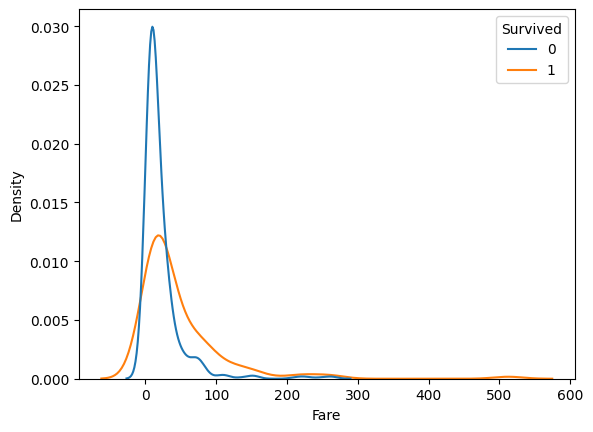

In [9]:
# ① kdeplot( , hue = 'Survived', common_norm = False)
sns.kdeplot(x='Fare', data = titanic, hue ='Survived',
            common_norm = False)
plt.show()

운임과 생존여부에 상관관계가 꽤 뚜렷하게 존재한다. 그래프상에서의 교점은 2개이다.

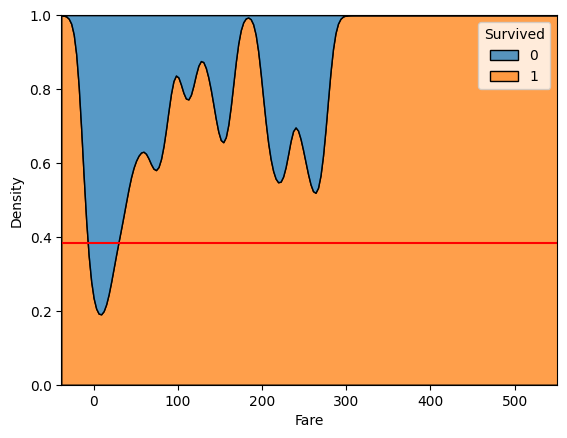

In [11]:
# ② kdeplot( , hue = 'Survived', multiple = 'fill')
sns.kdeplot(x='Fare', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()


운임에 따른 생존율에 꽤 큰 차이가 존재한다. 전체 평균 생존율과 괴리가 많이 발생한다.